In [3]:
!pip install opencv-python
!pip install opencv-contrib-python

     |████████████████████████████████| 50.4 MB 60.7 MB/s eta 0:00:01     | 6.0 MB 13.4 MB/s eta 0:00:04                          | 8.5 MB 13.4 MB/s eta 0:00:04███                         | 10.9 MB 13.4 MB/s eta 0:00:03��                       | 14.1 MB 13.4 MB/s eta 0:00:03████████                     | 17.3 MB 13.4 MB/s eta 0:00:03|████████████▎                   | 19.4 MB 13.4 MB/s eta 0:00:03███▌                 | 22.8 MB 13.4 MB/s eta 0:00:03��████████              | 28.4 MB 13.4 MB/s eta 0:00:02MB/s eta 0:00:02��████████████████████▉          | 34.3 MB 13.4 MB/s eta 0:00:02�█████████████████▍        | 36.9 MB 13.4 MB/s eta 0:00:02███████       | 39.4 MB 13.4 MB/s eta 0:00:01�████████████████████████▉     | 42.2 MB 13.4 MB/s eta 0:00:01█████████   | 45.7 MB 13.4 MB/s eta 0:00:01 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 56.4 MB 64.7 MB/s eta 0:00:01▏                             | 3.9 MB 8.6 MB/s eta 0:00:07  | 6.0 MB 8.6 MB/s eta 0:00:06                     

In [1]:
#import libraries 
import os
import cv2
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN  # For DBSCAN
import numpy as np
%matplotlib inline

In [2]:
def plot_image(img,size=(16,16)):
    plt.figure(figsize = size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #Since opencv store images as BGR

def siftDetector(img):
    sift = cv2.xfeatures2d.SIFT_create()
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    key_points, descriptors = sift.detectAndCompute(gray, None)
    return key_points,descriptors

def show_sift_features(color_img, kp,size=(16,16)):
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    plt.figure(figsize = size)
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))
    
def orbDetector(img):
    orb = cv2.ORB_create()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    kp = orb.detect(gray,None)
    kp, des = orb.compute(gray, kp)
    return kp, des

def surfDetector(img):
    surf = cv2.xfeatures2d.SURF_create()
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    key_points, descriptors = surf.detectAndCompute(gray, None)
    return key_points,descriptors



In [3]:
def make_clusters(de,eps=40,min_sample=2):
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(de)
    return clustering

def locate_forgery(img,clustering,kps):
    forgery=img.copy()
    clusters = [[] for i in range(np.unique(clustering.labels_).shape[0]-1)]
    
    for idx in range(len(kps)):
        if clustering.labels_[idx]!=-1:
            clusters[clustering.labels_[idx]].append((int(kps[idx].pt[0]),int(kps[idx].pt[1])))
    for points in clusters:
        if len(points)>1:
            for idx1 in range(len(points)):
                for idx2 in range(idx1+1,len(points)):
                    cluscol= list(np.random.random(size=3) * 256) 
                    cv2.line(forgery,points[idx2],points[idx1],cluscol,1)
    plot_image(forgery)


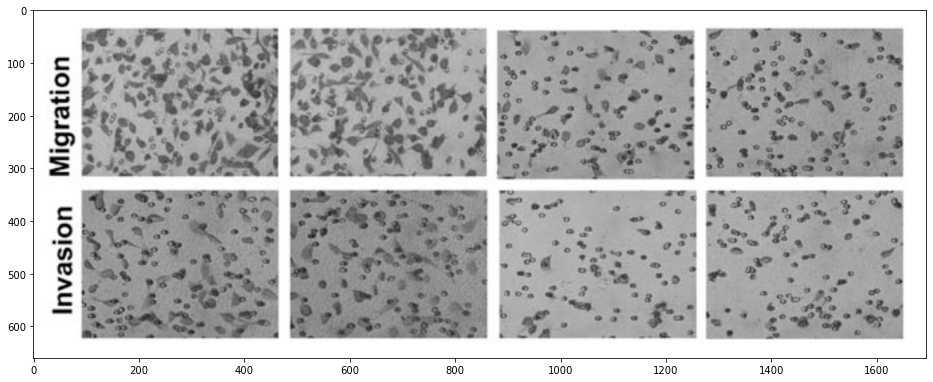

In [4]:
focalimg1=cv2.imread("siftImg/duplIm.png")
plot_image(focalimg1)

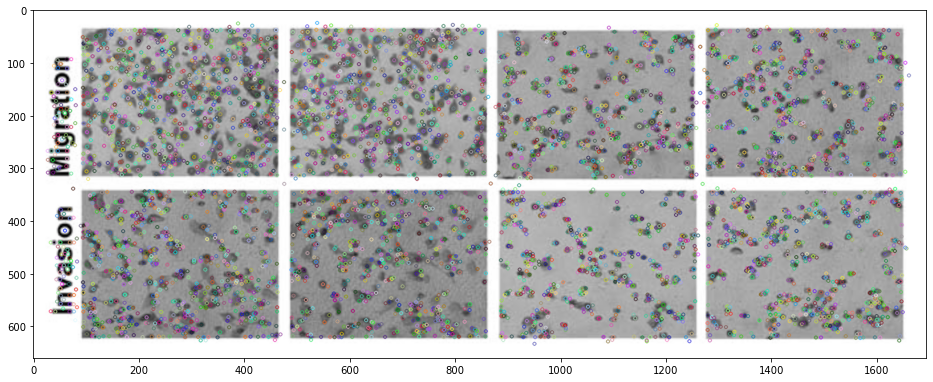

In [5]:
#Firs let us extract SIFT features
key_points,descriptors=siftDetector(focalimg1)
show_sift_features(focalimg1,key_points)


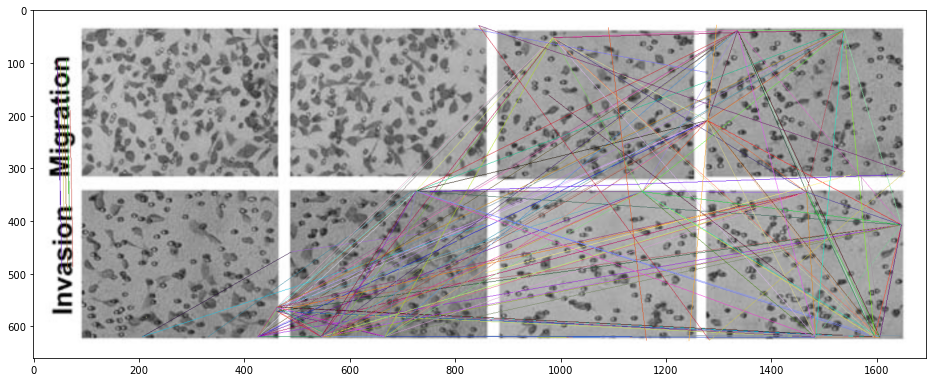

In [6]:
#Now Let's make clusters and locate forgery

clusters=make_clusters(descriptors, eps=90, min_sample=2)
locate_forgery(focalimg1,clusters,key_points)

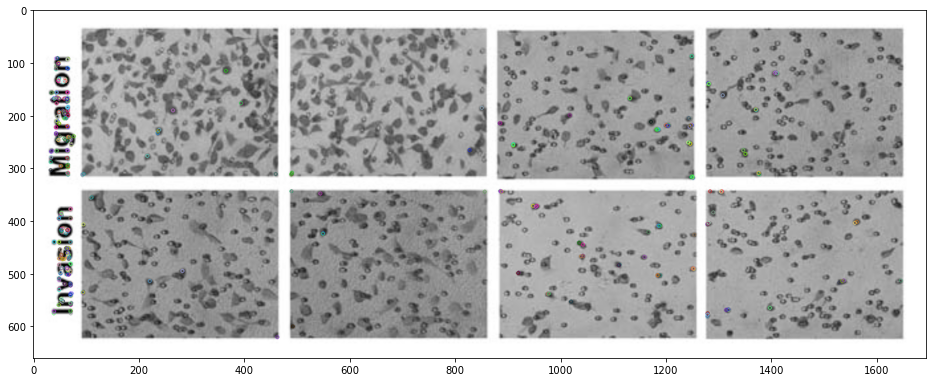

In [7]:
# try with ORB
orbkp, orbdes = orbDetector(focalimg1)
show_sift_features(focalimg1,orbkp)

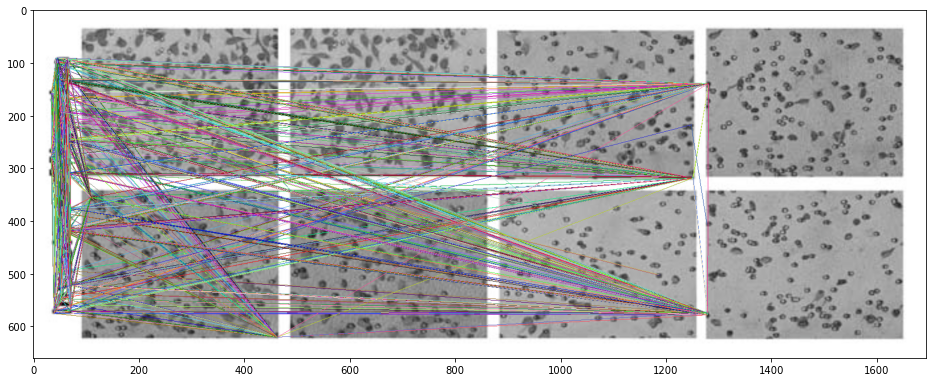

In [9]:
orbclusters = make_clusters(orbdes, eps=300, min_sample=2)
locate_forgery(focalimg1,orbclusters,orbkp)

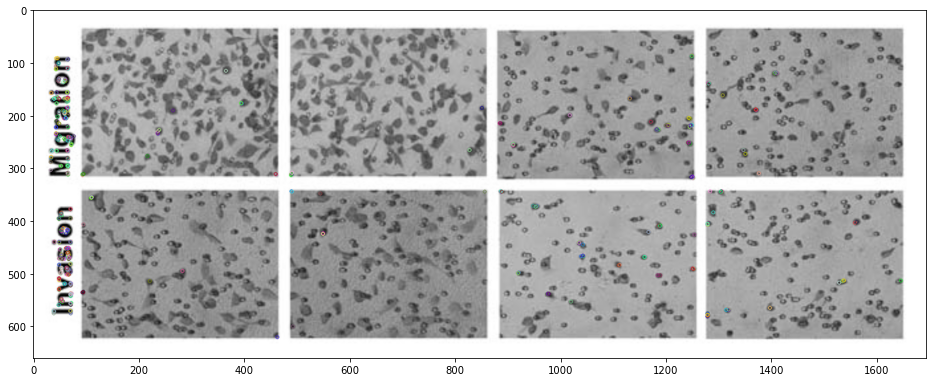

In [10]:
# try with SURF
surfkp, surfdes = orbDetector(focalimg1)
show_sift_features(focalimg1,surfkp)

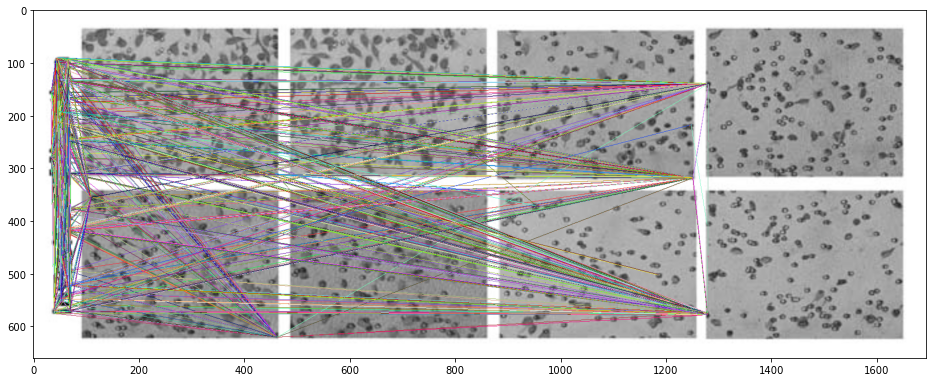

In [11]:
surfclusters = make_clusters(surfdes, eps=300, min_sample=2)
locate_forgery(focalimg1,surfclusters,surfkp)